<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Классификация" data-toc-modified-id="Классификация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Классификация</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Метод-опорных-векторов" data-toc-modified-id="Метод-опорных-векторов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Метод опорных векторов</a></span></li></ul></li><li><span><a href="#Метрики-классификации" data-toc-modified-id="Метрики-классификации-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Метрики классификации</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Точность,-полнота,-F1" data-toc-modified-id="Точность,-полнота,-F1-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Точность, полнота, F1</a></span></li><li><span><a href="#Precision-and-Recall" data-toc-modified-id="Precision-and-Recall-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision and Recall</a></span></li></ul></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Dummy-Encoging" data-toc-modified-id="Dummy-Encoging-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Dummy-Encoging</a></span></li><li><span><a href="#OrdinalEncoder" data-toc-modified-id="OrdinalEncoder-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>OrdinalEncoder</a></span></li></ul></li></ul></div>

# Загрузка библиотек 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, rcParamsDefault

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_circles, make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve


In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

rcParams['figure.figsize'] = (6,6)
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
factor = 1
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

def generate_nonlinear_regression(n_sample=100):
    rng = np.random.RandomState(0)
    data_max, data_min = 1.4, -1.4
    len_data = (data_max - data_min)
    data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
    noise = rng.randn(n_sample) * .3
    target = data ** 3 - 0.5 * data ** 2 + noise
    return data, target

# Классификация

## Логистическая регрессия

In [3]:
df = sns.load_dataset('penguins').dropna()
data_columns = ["bill_length_mm", "bill_depth_mm"]
target_column = "species"

data = df[data_columns]
target = df[target_column]

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,Male


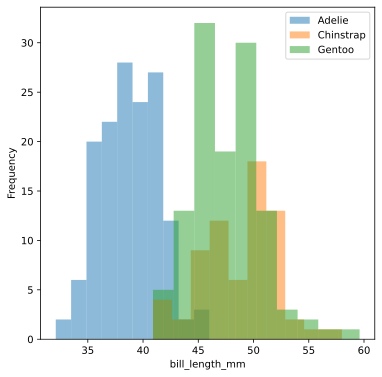

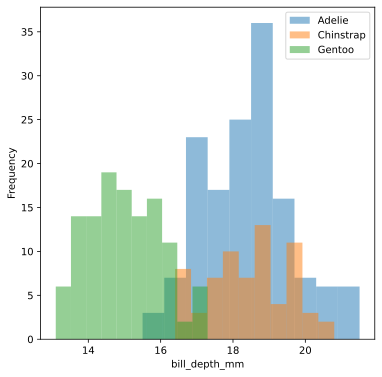

In [4]:
# посмотрим на гистограммы распределения 

for feature_name in data_columns:
    plt.figure()
    df.groupby("species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [5]:
# !pip install --upgrade scikit-learn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

In [7]:
model = LogisticRegression()
model.fit(data, target)
predicted = model.predict(data)

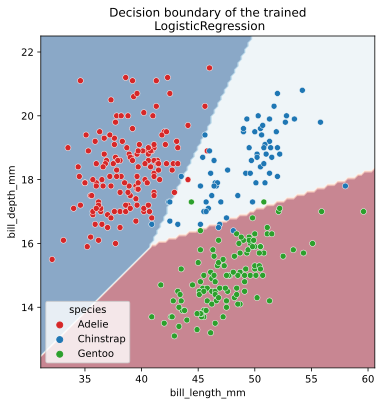

In [8]:
DecisionBoundaryDisplay.from_estimator(
    model, df[data_columns], response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=df, x=data_columns[0], y=data_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue", "tab:green"])
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [9]:
accuracy_score(target, predicted)

0.963963963963964

## Метод опорных векторов

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

model = SVC(kernel="rbf", gamma=0.1) #rbf
model.fit(data, target)
predicted = model.predict(data)

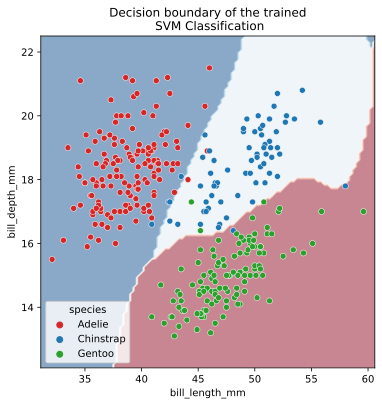

In [11]:
DecisionBoundaryDisplay.from_estimator(
    model, data, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=df, x=data_columns[0], y=data_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue", "tab:green"])
_ = plt.title("Decision boundary of the trained\n SVM Classification")

In [12]:
accuracy_score(target, predicted)

0.96996996996997

# Метрики классификации

In [13]:
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv', index_col='customer_id')
df = df.dropna().drop(columns=['country', 'gender'])
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1
15647311,608,41,1,83807.86,1,0,1,112542.58,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1
15701354,699,39,1,0.00,2,0,0,93826.63,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [14]:
X = df.drop(columns=['churn'])
y = df.churn
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

test_y.value_counts()

0    1607
1     393
Name: churn, dtype: int64

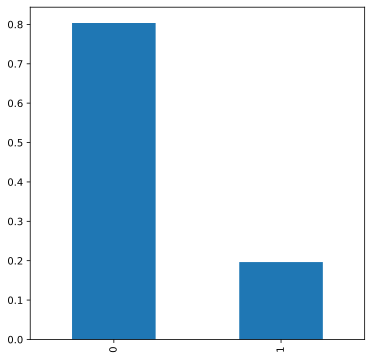

In [15]:
_ = test_y.value_counts(normalize=True).plot(kind='bar')

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
preds = model.predict(test_X)
preds.sum()

135

In [17]:
print(f'Accuracy = {accuracy_score(test_y, preds):.2}')
model.score(test_X, test_y)

Accuracy = 0.8


0.803

In [18]:
print(f'Accuracy = {accuracy_score(test_y, preds):.2}')
preds[:] = 0
preds.sum()

Accuracy = 0.8


0

In [19]:
print(f'Accuracy = {accuracy_score(test_y, preds)}')


Accuracy = 0.8035


## Accuracy

Accuracy = 0.8


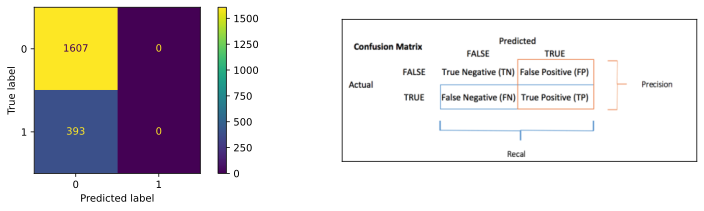

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print(f'Accuracy = {accuracy_score(test_y, preds):.2}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 3) )

cm = confusion_matrix(test_y, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

img = plt.imread('cm_explained.png')
disp.plot(ax=axes[0])
axes[1].imshow(img)

axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()

## Точность, полнота, F1

<div>
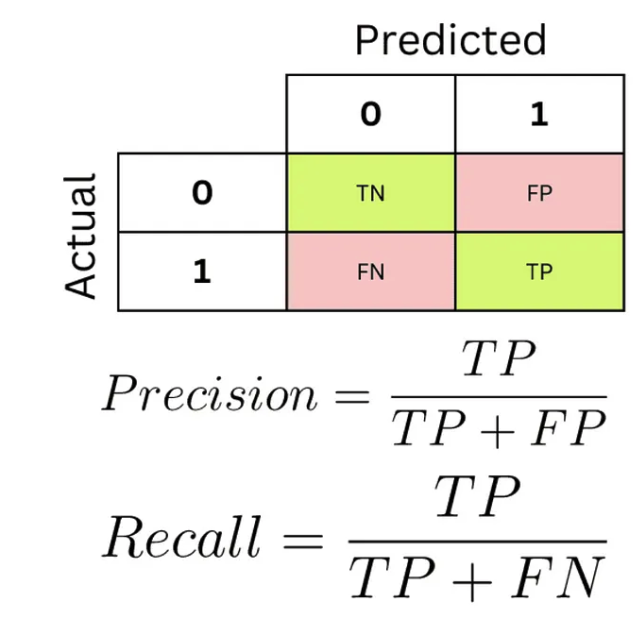
</div>

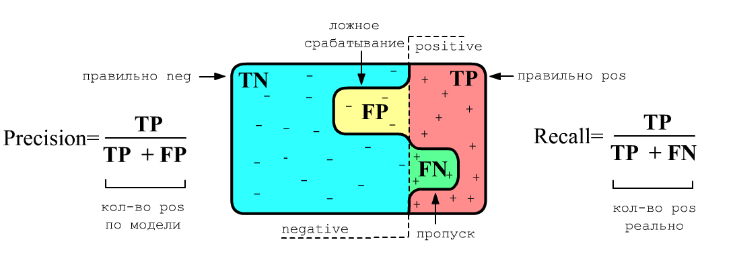

<div>
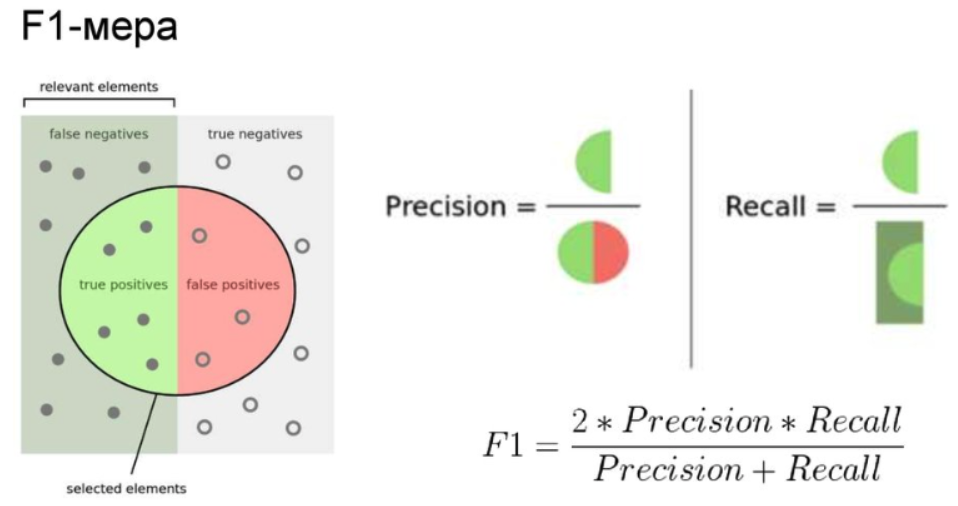
</div>

## Precision and Recall

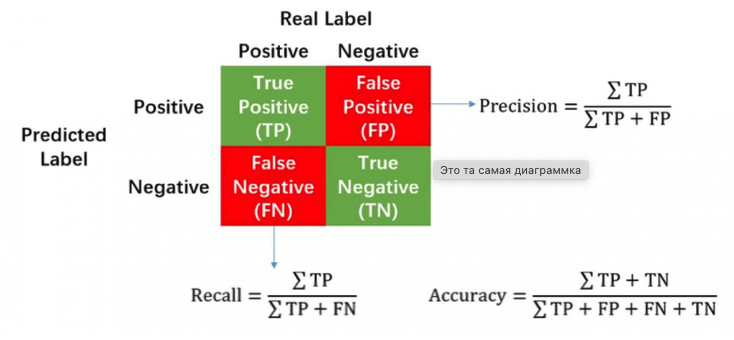

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f'Precision = {precision_score(test_y, preds):.2}')
print(f'Recall = {recall_score(test_y, preds):.2}')
print(f'f1-score = {f1_score(test_y, preds):.2}')

Precision = 0.0
Recall = 0.0
f1-score = 0.0


In [22]:
model.predict_proba(test_X)

array([[0.7543133 , 0.2456867 ],
       [0.77021508, 0.22978492],
       [0.70267431, 0.29732569],
       ...,
       [0.79582386, 0.20417614],
       [0.884513  , 0.115487  ],
       [0.71803786, 0.28196214]])

In [23]:
model.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
churn_proba = model.predict_proba(test_X)[:,1]
churn_proba

array([0.2456867 , 0.22978492, 0.29732569, ..., 0.20417614, 0.115487  ,
       0.28196214])

In [25]:
threshold = 0.2

preds = np.where(churn_proba>threshold, 1, 0)
preds

array([1, 1, 1, ..., 1, 0, 1])

In [26]:
print(f'Precision = {precision_score(test_y, preds):.2}')
print(f'Recall = {recall_score(test_y, preds):.2}')
print(f'f1-score = {f1_score(test_y, preds):.2}')
print(f'Accuracy = {accuracy_score(test_y, preds):.2}')

Precision = 0.3
Recall = 0.66
f1-score = 0.41
Accuracy = 0.63


In [27]:
threshold = 0.8

preds = np.where(churn_proba>threshold, 1, 0)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
print(f'Precision = {precision_score(test_y, preds):.2}')
print(f'Recall = {recall_score(test_y, preds):.2}')
print(f'f1-score = {f1_score(test_y, preds):.2}')
print(f'Accuracy = {accuracy_score(test_y, preds):.2}')

Precision = 0.43
Recall = 0.0076
f1-score = 0.015
Accuracy = 0.8


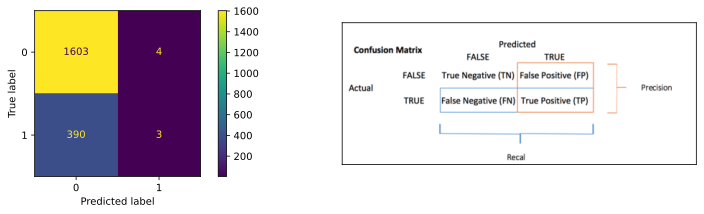

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 3) )

cm = confusion_matrix(test_y, preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

img = plt.imread('cm_explained.png')
disp.plot(ax=axes[0])
axes[1].imshow(img)

axes[1].set_xticks([])
axes[1].set_yticks([])
plt.show()

# Кодирование категориальных признаков

Библиотека с различными кодировщиками - http://contrib.scikit-learn.org/category_encoders/

## OneHotEncoder

<div>
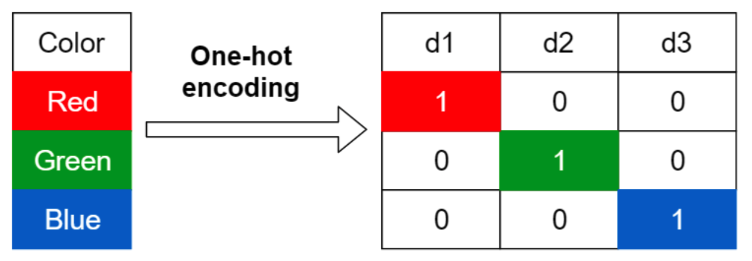
</div>

In [30]:
from sklearn.preprocessing import OneHotEncoder

data = {
    "city": [
        "Smolensk", "Smolensk", "Smolensk", "Omsk", "Omsk", "Omsk", "Omsk",
        "Yakutsk", "Yakutsk", "Yakutsk", "Yakutsk", "Yakutsk"
    ],
    "mortgage": [
        'Yes', 'No', 'Yes', 'Yes', 'Yes',
        'No', 'No', 'Yes', 'Yes', 'No', 'No',
        'Yes'
    ],
    "type": [
        'Townhouse', 'Flat', 'Cotеage', 'Flat', 'Flat',
        'Cottage', 'Villa', 'Villa', 'Flat', 'Flat', 'Townhouse',
        'Flat'
    ],
    "square": [128, 42, 650, 54, 32, 88, 250, 850, 44, 56, 180, 28]
}

df = pd.DataFrame(data)
df

,city,mortgage,type,square
0,Smolensk,Yes,Townhouse,128
1,Smolensk,No,Flat,42
2,Smolensk,Yes,Cotеage,650
3,Omsk,Yes,Flat,54
4,Omsk,Yes,Flat,32
5,Omsk,No,Cottage,88
6,Omsk,No,Villa,250
7,Yakutsk,Yes,Villa,850
8,Yakutsk,Yes,Flat,44
9,Yakutsk,No,Flat,56


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      12 non-null     object
 1   mortgage  12 non-null     object
 2   type      12 non-null     object
 3   square    12 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 512.0+ bytes


In [32]:
ohe = OneHotEncoder(sparse_output=False)

df_ohe = ohe.fit_transform(df)
df_ohe

array([[0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.,

In [33]:
ohe.get_feature_names_out()

array(['city_Omsk', 'city_Smolensk', 'city_Yakutsk', 'mortgage_No',
       'mortgage_Yes', 'type_Cottage', 'type_Cotеage', 'type_Flat',
       'type_Townhouse', 'type_Villa', 'square_28', 'square_32',
       'square_42', 'square_44', 'square_54', 'square_56', 'square_88',
       'square_128', 'square_180', 'square_250', 'square_650',
       'square_850'], dtype=object)

In [34]:
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe

,city_Omsk,city_Smolensk,city_Yakutsk,mortgage_No,mortgage_Yes,type_Cottage,type_Cotеage,type_Flat,type_Townhouse,type_Villa,square_28,square_32,square_42,square_44,square_54,square_56,square_88,square_128,square_180,square_250,square_650,square_850
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
6,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
7,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
8,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [35]:
cat_columns = df.select_dtypes('object').columns.tolist()
cat_columns

['city', 'mortgage', 'type']

In [36]:
ohe = OneHotEncoder(sparse_output=False)
df_ohe = ohe.fit_transform(df[cat_columns])

df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe

,city_Omsk,city_Smolensk,city_Yakutsk,mortgage_No,mortgage_Yes,type_Cottage,type_Cotеage,type_Flat,type_Townhouse,type_Villa
0,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
5,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
7,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
8,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
9,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00


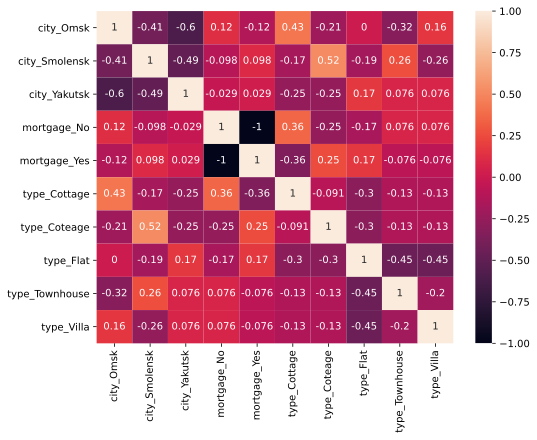

In [37]:
fig = plt.figure(figsize=(8,6))
_ = sns.heatmap(df_ohe.corr(), annot=True, vmin=-1, vmax=1)

In [38]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
df_ohe = ohe.fit_transform(df[cat_columns])
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe

,city_Smolensk,city_Yakutsk,mortgage_Yes,type_Cotеage,type_Flat,type_Townhouse,type_Villa
0,1.00,0.00,1.00,0.00,0.00,1.00,0.00
1,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1.00,0.00,1.00,1.00,0.00,0.00,0.00
3,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,0.00,0.00,1.00,0.00,1.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7,0.00,1.00,1.00,0.00,0.00,0.00,1.00
8,0.00,1.00,1.00,0.00,1.00,0.00,0.00
9,0.00,1.00,0.00,0.00,1.00,0.00,0.00


,square,city_Smolensk,city_Yakutsk,mortgage_Yes,type_Cotеage,type_Flat,type_Townhouse,type_Villa
0,128,1.00,0.00,1.00,0.00,0.00,1.00,0.00
1,42,1.00,0.00,0.00,0.00,1.00,0.00,0.00
2,650,1.00,0.00,1.00,1.00,0.00,0.00,0.00
3,54,0.00,0.00,1.00,0.00,1.00,0.00,0.00
4,32,0.00,0.00,1.00,0.00,1.00,0.00,0.00
5,88,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,250,0.00,0.00,0.00,0.00,0.00,0.00,1.00
7,850,0.00,1.00,1.00,0.00,0.00,0.00,1.00
8,44,0.00,1.00,1.00,0.00,1.00,0.00,0.00
9,56,0.00,1.00,0.00,0.00,1.00,0.00,0.00


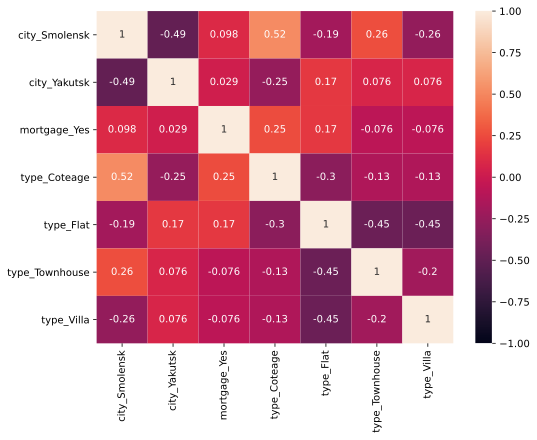

In [39]:
fig = plt.figure(figsize=(8,6))
_ = sns.heatmap(df_ohe.corr(), annot=True,  vmin=-1, vmax=1)

df[ohe.get_feature_names_out()] = df_ohe 
df.drop(columns=cat_columns, inplace=True)

df

Хорошая библиотека для кодирования признаков. Умеет работать с отдельными столбцами из Пандас. https://contrib.scikit-learn.org/category_encoders/

## Dummy-Encoging

<div>
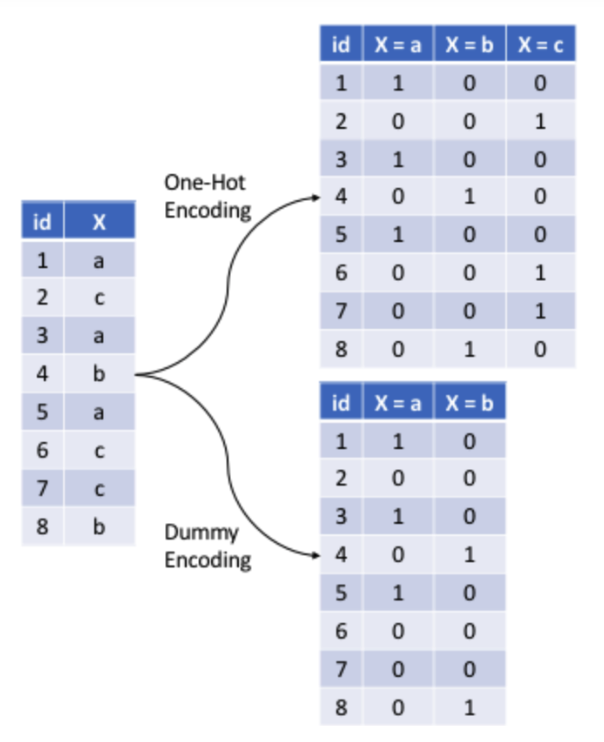
</div>

In [40]:
df = pd.DataFrame(data)
df

,city,mortgage,type,square
0,Smolensk,Yes,Townhouse,128
1,Smolensk,No,Flat,42
2,Smolensk,Yes,Cotеage,650
3,Omsk,Yes,Flat,54
4,Omsk,Yes,Flat,32
5,Omsk,No,Cottage,88
6,Omsk,No,Villa,250
7,Yakutsk,Yes,Villa,850
8,Yakutsk,Yes,Flat,44
9,Yakutsk,No,Flat,56


In [41]:
df_dummies = pd.get_dummies(df)
df_dummies

,square,city_Omsk,city_Smolensk,city_Yakutsk,mortgage_No,mortgage_Yes,type_Cottage,type_Cotеage,type_Flat,type_Townhouse,type_Villa
0,128,0,1,0,0,1,0,0,0,1,0
1,42,0,1,0,1,0,0,0,1,0,0
2,650,0,1,0,0,1,0,1,0,0,0
3,54,1,0,0,0,1,0,0,1,0,0
4,32,1,0,0,0,1,0,0,1,0,0
5,88,1,0,0,1,0,1,0,0,0,0
6,250,1,0,0,1,0,0,0,0,0,1
7,850,0,0,1,0,1,0,0,0,0,1
8,44,0,0,1,0,1,0,0,1,0,0
9,56,0,0,1,1,0,0,0,1,0,0


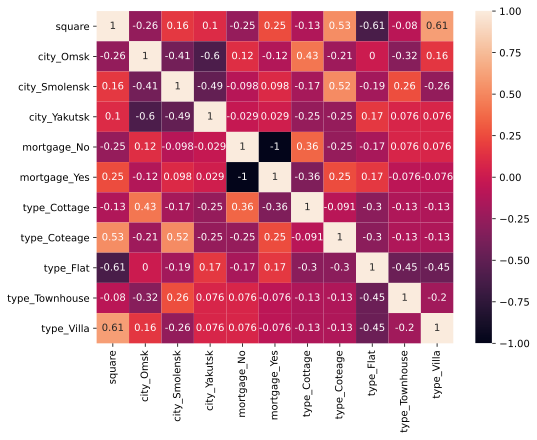

In [42]:
fig = plt.figure(figsize=(8,6))
_ = sns.heatmap(df_dummies.corr(), annot=True,  vmin=-1, vmax=1)

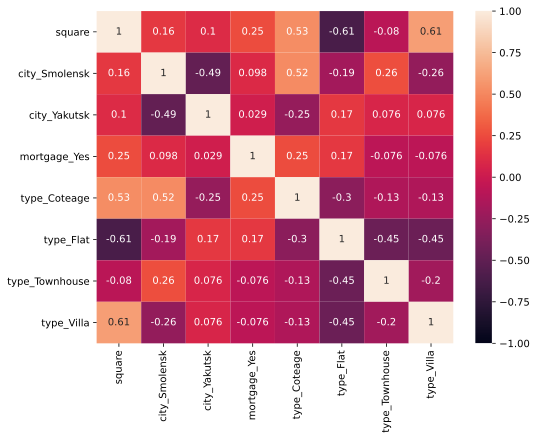

In [43]:
df_dummies = pd.get_dummies(df, drop_first=True)

fig = plt.figure(figsize=(8,6))
_ = sns.heatmap(df_dummies.corr(), annot=True,  vmin=-1, vmax=1)

## OrdinalEncoder

<div>
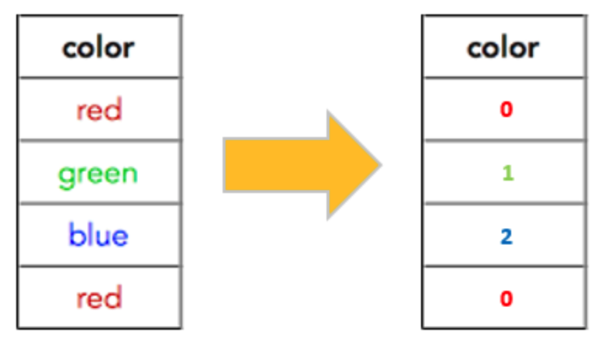
</div>

In [44]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df = pd.DataFrame(data)
cat_columns = df.select_dtypes('object').columns

df_oe = oe.fit_transform(df[cat_columns])
df_oe

array([[1., 1., 3.],
       [1., 0., 2.],
       [1., 1., 1.],
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 0., 0.],
       [0., 0., 4.],
       [2., 1., 4.],
       [2., 1., 2.],
       [2., 0., 2.],
       [2., 0., 3.],
       [2., 1., 2.]])

In [45]:
df[cat_columns] = df_oe
df

,city,mortgage,type,square
0,1.00,1.00,3.00,128
1,1.00,0.00,2.00,42
2,1.00,1.00,1.00,650
3,0.00,1.00,2.00,54
4,0.00,1.00,2.00,32
5,0.00,0.00,0.00,88
6,0.00,0.00,4.00,250
7,2.00,1.00,4.00,850
8,2.00,1.00,2.00,44
9,2.00,0.00,2.00,56
